# Imports and function definition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import ast

from spectrum_helper_calcs import *

In [2]:
def get_processed_data_from_file(path_to_file):
    '''
    Retrieve processed spectrum data from specified file which can optionally have
    one comment line as the first line in the file.
    
    Arguments:
        path_to_file - relative path (including name) to processed data file
    
    Returns:
        header string - None if there is no header string
        numpy array with data. Columns are wavelength, spectrum, and (optionally) standard deviation
    '''
    # Read header line
    with open(path_to_file) as f:
        line = f.readline()
        li=line.strip()
        if li.startswith('#'):
            header = ast.literal_eval(li[2:])  # strip '# ' and convert to dict
        else:
            header = None
    # Read the rest of the file
    data = np.loadtxt(path_to_file, delimiter=',', dtype=float)
    return header, data

# Read data

In [3]:
asiga_info, asiga_spectrum = get_processed_data_from_file('asiga_pico_plus_27/processed_data/asiga_2015-06-27.csv')
visitech_info, visitech_spectrum = get_processed_data_from_file('visitech_luxbeam_LRS_WQ/processed_data/visitech_2016-07-27.csv')

# Comparison spectrum information and plot

In [15]:
a_peak_Index = find_index_of_max(asiga_spectrum[:,1])
a_FWHM_indices = find_FWHM_indices(asiga_spectrum[:,1])
a_FWHM_nm = calc_FWHM_nm(asiga_spectrum)
v_peak_Index = find_index_of_max(visitech_spectrum[:,1])
v_FWHM_indices = find_FWHM_indices(visitech_spectrum[:,1])
v_FWHM_nm = calc_FWHM_nm(visitech_spectrum)
print('                                     Asiga   Visitech')
print('             Index of emission peak:  {:d}     {:d}'.format(a_peak_Index, v_peak_Index))
print('   Wavelength of emission peak (nm):  {:5.1f}   {:5.1f}'.format(asiga_spectrum[a_peak_Index,0], visitech_spectrum[v_peak_Index,0]))
print('Value at emission peak (normalized):  {:5.1f}   {:5.1f}'.format(asiga_spectrum[a_peak_Index,1], visitech_spectrum[v_peak_Index,1]))
print('                          FWHM (nm):  {:5.1f}   {:5.1f}'.format(a_FWHM_nm, v_FWHM_nm))

                                     Asiga   Visitech
             Index of emission peak:  227     195
   Wavelength of emission peak (nm):  411.8   386.5
Value at emission peak (normalized):    1.0     1.0
                          FWHM (nm):   26.8    24.5


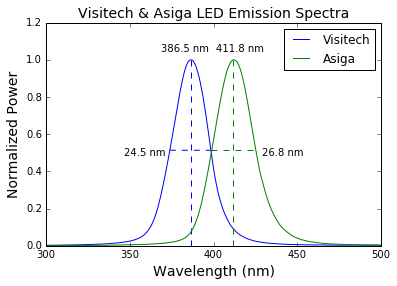

In [35]:
fig, ax = plt.subplots()

ax.plot(visitech_spectrum[:,0], visitech_spectrum[:,1], label='Visitech')
ax.plot([visitech_spectrum[v_peak_Index,0], visitech_spectrum[v_peak_Index,0]], 
        [0, visitech_spectrum[v_peak_Index,1]], 'b--')
ax.text(0.99*visitech_spectrum[v_peak_Index,0], 1.09, '{:5.1f} nm'.format(visitech_spectrum[v_peak_Index,0]),
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transData)
ax.plot([visitech_spectrum[v_FWHM_indices[0],0], visitech_spectrum[v_FWHM_indices[1],0]], 
        [visitech_spectrum[v_FWHM_indices[0],1], visitech_spectrum[v_FWHM_indices[1],1]], 'b--')
ax.text(visitech_spectrum[v_FWHM_indices[0],0]-0.6*v_FWHM_nm, 0.5, '{:4.1f} nm'.format(v_FWHM_nm),
        verticalalignment='center', horizontalalignment='center',
        transform=ax.transData)

ax.plot(asiga_spectrum[:,0], asiga_spectrum[:,1], label='Asiga')
ax.plot([asiga_spectrum[a_peak_Index,0], asiga_spectrum[a_peak_Index,0]], 
        [0, asiga_spectrum[a_peak_Index,1]], 'g--')
ax.text(1.01*asiga_spectrum[a_peak_Index,0], 1.09, '{:5.1f} nm'.format(asiga_spectrum[a_peak_Index,0]),
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transData)
ax.plot([asiga_spectrum[a_FWHM_indices[0],0], asiga_spectrum[a_FWHM_indices[1],0]], 
        [asiga_spectrum[a_FWHM_indices[1],1], asiga_spectrum[a_FWHM_indices[1],1]], 'g--')
ax.text(asiga_spectrum[a_FWHM_indices[1],0]+0.6*a_FWHM_nm, 0.5, '{:4.1f} nm'.format(a_FWHM_nm),
        verticalalignment='center', horizontalalignment='center',
        transform=ax.transData)

ax.legend()
ax.set_xlim(300, 500)
ax.set_ylim(0, 1.2)
ax.set_xlabel('Wavelength (nm)', fontsize='14')
ax.set_ylabel('Normalized Power', fontsize='14')
ax.set_title('Visitech & Asiga LED Emission Spectra', fontsize='14');
#plt.savefig('compare_visitech_asiga_spectra.png')